In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import zipfile
import os

zip_path = '/content/drive/MyDrive/graduation model/cigarette_smoker.zip'
cigarette_smoker = '/content/cigarette_data/data'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(cigarette_smoker)

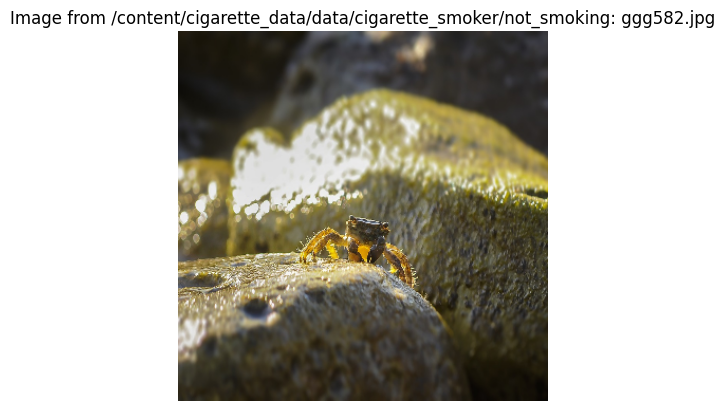

Image size: 367500


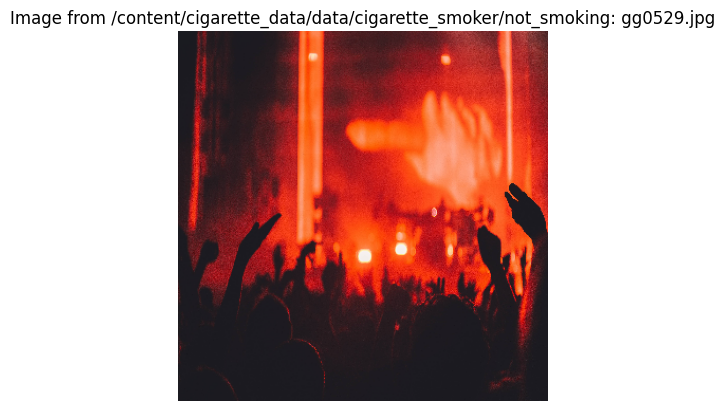

Image size: 367500


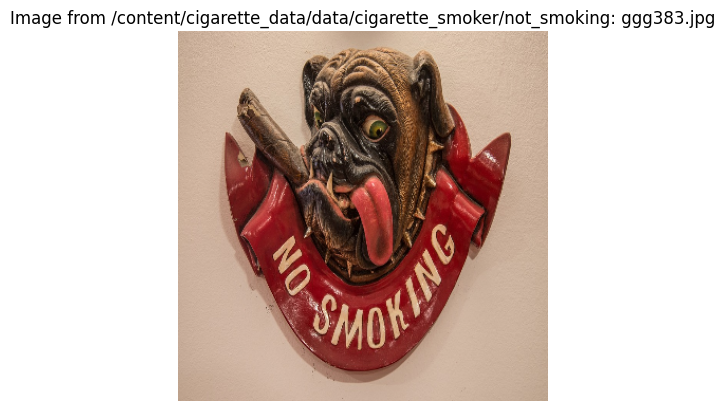

Image size: 367500


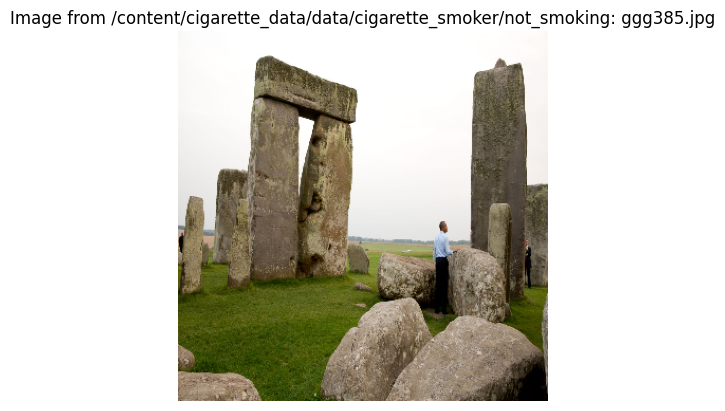

Image size: 367500


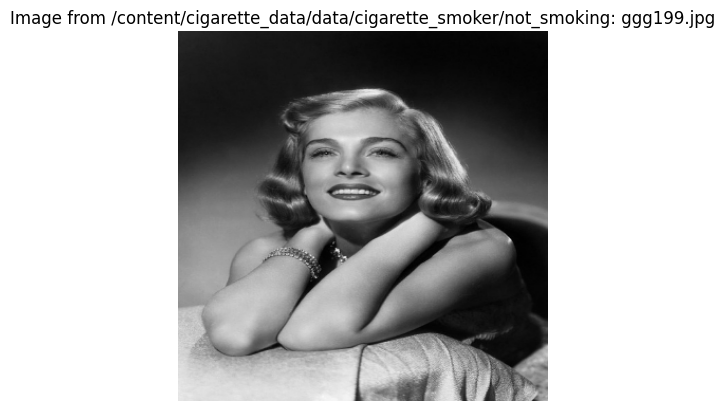

Image size: 367500


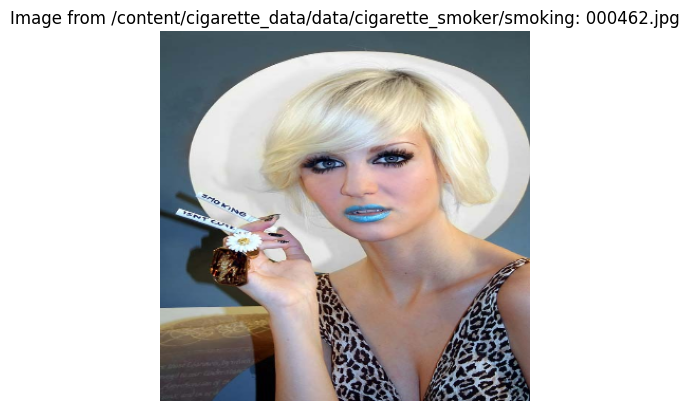

Image size: 367500


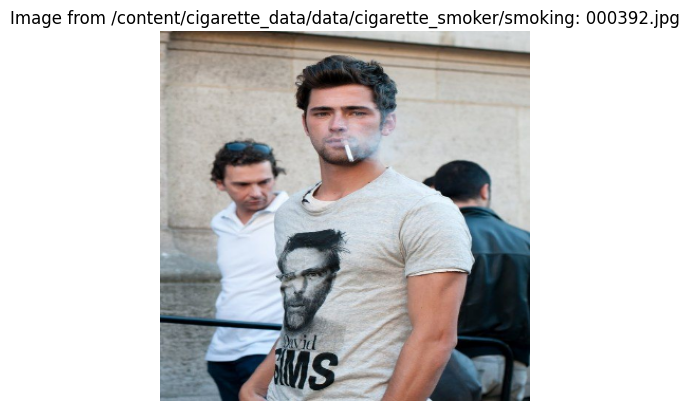

Image size: 367500


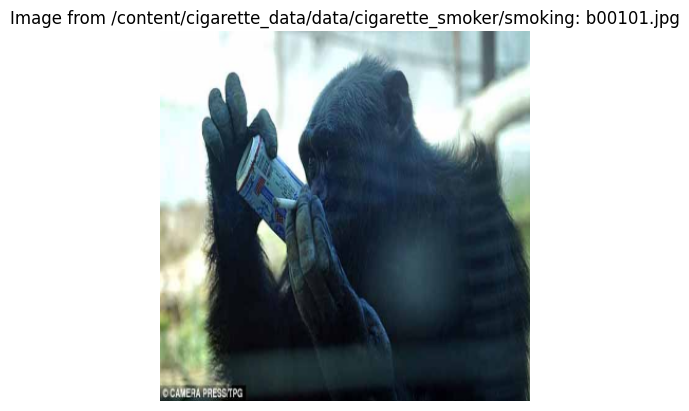

Image size: 367500


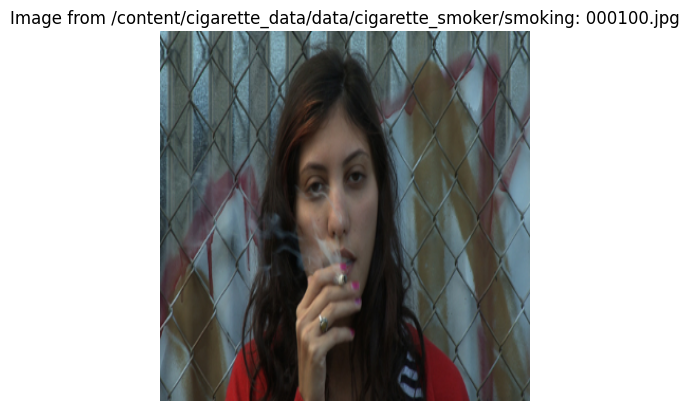

Image size: 367500


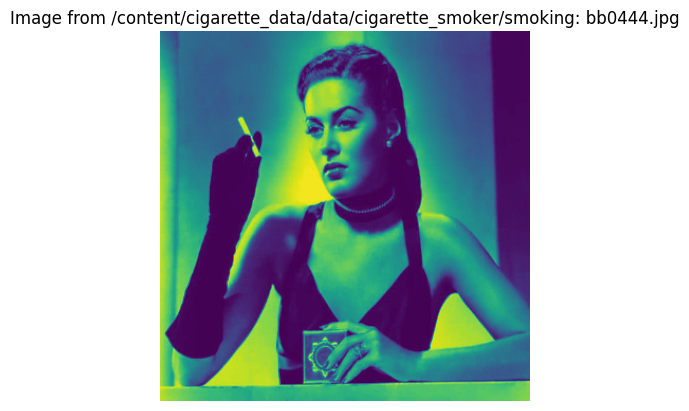

Image size: 122500


In [ ]:
not_smoking="/content/cigarette_data/data/cigarette_smoker/not_smoking"
smoking="/content/cigarette_data/data/cigarette_smoker/smoking"


import random
import matplotlib.pyplot as plt
from PIL import Image
import cv2 as cv


h=350
w=350
def visualize_random_images(folder, num_images=5):


    image_files = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
    random_images = random.sample(image_files, num_images)

    for image_file in random_images:
        image_path = os.path.join(folder, image_file)
        image = Image.open(image_path)
        image = np.array(image)
        image = cv.resize(image, (h, w))
        plt.figure()
        plt.imshow(image)
        plt.title(f"Image from {folder}: {image_file}")
        plt.axis('off')
        plt.show()
        print(f"Image size: {image.size}")

visualize_random_images(not_smoking)
visualize_random_images(smoking)

In [ ]:
images = []
labels = []

# Iterate through  "not_smoking" folder
for filename in os.listdir(not_smoking):
    if filename.endswith(('.jpg', '.jpeg', '.png')):  # Check for image files
        img_path = os.path.join(not_smoking, filename)
        images.append(img_path)
        labels.append(0)  # Label 0 for "not_smoking"

# Iterate through  "smoking" folder
for filename in os.listdir(smoking):
    if filename.endswith(('.jpg', '.jpeg', '.png')):  # Check for image files
        img_path = os.path.join(smoking, filename)
        images.append(img_path)
        labels.append(1)  # Label 1 for "smoking"

# Shuffle the data
combined = list(zip(images, labels))
random.shuffle(combined)
images, labels = zip(*combined)

print(f"Number of images: {len(images)}")
print(f"Number of labels: {len(labels)}")

Number of images: 3145
Number of labels: 3145


In [ ]:
resized_images = []
for i in images:
    img = Image.open(i).convert('RGB')
    img = img.resize((350, 350))
    resized_images.append(np.array(img))

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)



from sklearn.model_selection import train_test_split

# Split the data into 90% training and 10% testing
x_train, x_test, y_train, y_test = train_test_split(
    resized_images, labels, test_size=0.2, random_state=32
)



In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

x_train = np.array(x_train)
x_test = np.array(x_test)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(350, 350))


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(516, activation='relu')(x)
x = Dense(516, activation='relu')(x)



predictions = Dense(2, activation='softmax')(x)



model = Model(inputs=base_model.input, outputs=predictions)


for layer in base_model.layers:
    layer.trainable = False


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test))


# Save the model in HDF5 format
model.save('/content/model.hdf5', save_format='hdf5')

In [ ]:
!pip install ultralytics